In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Import Data from CSV file
import csv

test_x = []
test_y = []
test_z = []
test_h = []

train_x = []
train_y = []
train_z = []
train_h = []

with open('drive/My Drive/machine_learning_data/data_test.csv', newline='') as test_file:
  reader  = csv.reader(test_file, delimiter=',')
  test_ct = 1 
  for i in reader:
    test_x.append(float(i[0]))
    test_y.append(float(i[1]))
    test_z.append(float(i[2]))
    test_h.append(float(i[3]))
    test_ct += 1

with open('drive/My Drive/machine_learning_data/data_train.csv', newline='') as train_file:
  reader  = csv.reader(train_file, delimiter=',')
  train_ct = 1 
  for i in reader:
    train_x.append(float(i[0]))
    train_y.append(float(i[1]))
    train_z.append(float(i[2]))
    train_h.append(float(i[3]))
    train_ct += 1

In [0]:
#Make array as np.array
import numpy as np
test_x = np.array(test_x)
test_y = np.array(test_y)
test_z = np.array(test_z)
test_h = np.array(test_h)

train_x = np.array(train_x)
train_y = np.array(train_y)
train_z = np.array(train_z)
train_h = np.array(train_h)

In [0]:
#initialize Train Parameter
theta0 = 1
theta1 = 1
theta2 = 1
theta3 = 1

In [0]:
#Define linear function & cost function & derivative function of cost function
def fTheta(x, y, z):
  return theta0 + theta1*x + theta2*y + theta3*z

def j(x, y, z, h, m):
  return (np.sum((fTheta(x, y, z) - h)**2)/(2*m))

def jPrimeTheta0():
  return (np.sum(fTheta(train_x, train_y, train_z) - train_h))/train_ct

def jPrimeTheta1():
  return (np.sum((fTheta(train_x, train_y, train_z) - train_h)*train_x))/train_ct

def jPrimeTheta2():
  return (np.sum((fTheta(train_x, train_y, train_z) - train_h)*train_y))/train_ct

def jPrimeTheta3():
  return (np.sum((fTheta(train_x, train_y, train_z) - train_h)*train_z))/train_ct

In [0]:
#Define update Function

learningRate = 0.00002

def updateTheta():
  updateTheta0 = theta0 - (learningRate*jPrimeTheta0())
  updateTheta1 = theta1 - (learningRate*jPrimeTheta1())
  updateTheta2 = theta2 - (learningRate*jPrimeTheta2())
  updateTheta3 = theta3 - (learningRate*jPrimeTheta3())
  
  return updateTheta0, updateTheta1, updateTheta2, updateTheta3

In [0]:
#Training_error, Training_theta0, Training_theta1, Training_theta2, Training_theta3 for Visualization 
training_error = []
testing_error = []
training_theta0 = []
training_theta1 = []
training_theta2 = []
training_theta3 = []
training_iter = 0

#Learning
while(1):
  training_error.append(j(train_x, train_y, train_z, train_h, train_ct))
  testing_error.append(j(test_x, test_y, test_z, test_h, test_ct))
  training_theta0.append(theta0)
  training_theta1.append(theta1)
  training_theta2.append(theta2)
  training_theta3.append(theta3)

  tempTheta0 = theta0
  tempTheta1 = theta1
  tempTheta2 = theta2
  tempTheta3 = theta3
  
  print('j :' + str(j(train_x, train_y, train_z, train_h, train_ct)))
  if (tempTheta0 == theta0) and (tempTheta1 == theta1) and (tempTheta2 == theta2) and (tempTheta3 == theta3):
    break

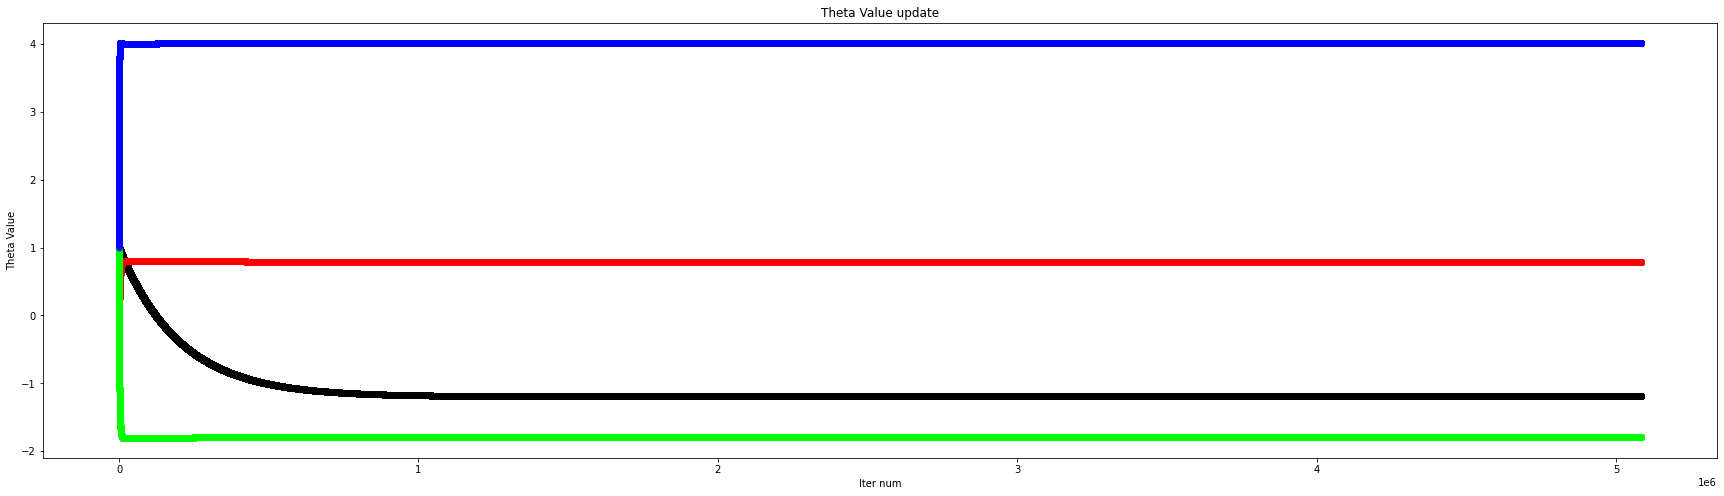

In [16]:
#Visualize of Estimated Parameters
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 8))
plt.scatter(range(len(training_error)), training_theta0, alpha=0.3, color = [0, 0, 0])
plt.scatter(range(len(training_error)), training_theta1, alpha=0.3, color = [1, 0, 0])
plt.scatter(range(len(training_error)), training_theta2, alpha=0.3, color = [0, 1, 0])
plt.scatter(range(len(training_error)), training_theta3, alpha=0.3, color = [0, 0, 1])
plt.title('Theta Value update')
plt.xlabel('Iter num')
plt.ylabel('Theta Value')
# plt.plot(x, hTheta(), color=[1, 0, 0])
plt.show()

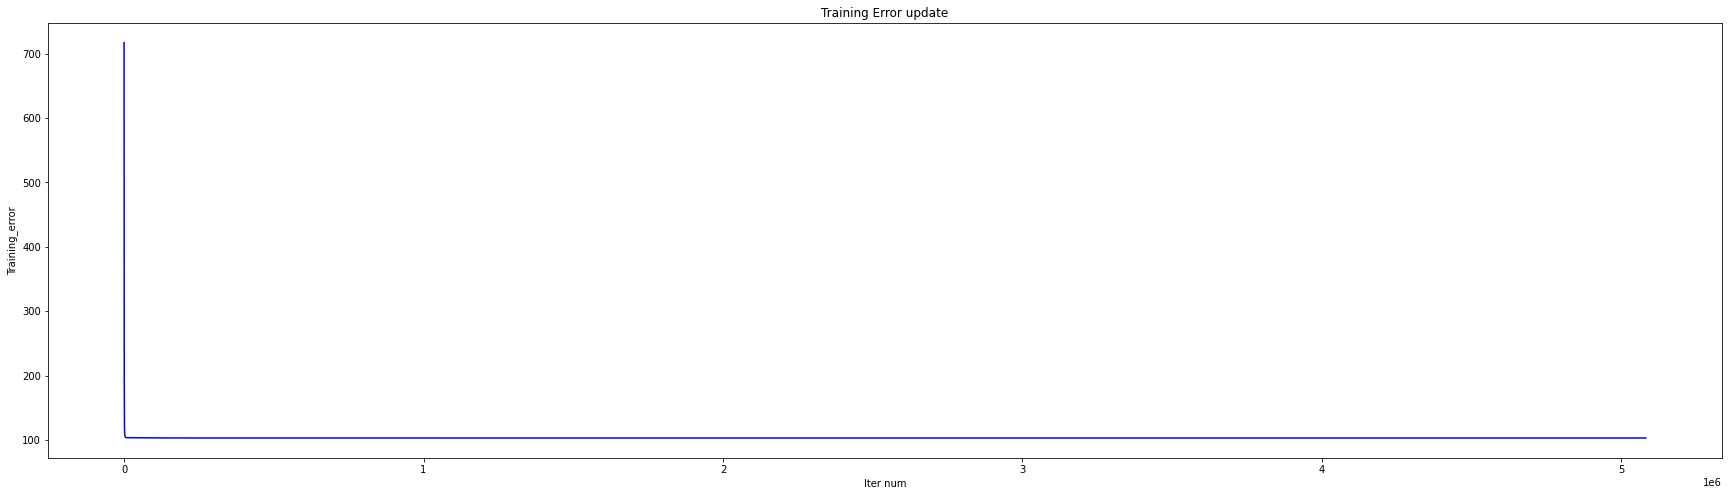

In [17]:
#Visualize of Training Error
plt.figure(figsize=(30, 8))
plt.plot(range(len(training_error)), training_error, color = [0, 0, 1])
plt.title('Training Error update')
plt.xlabel('Iter num')
plt.ylabel('Training_error')
plt.show()